In [19]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from qutip import Bloch, about, basis, mesolve,sigmax, sigmay, sigmaz,identity,fidelity,expect,Options,sigmap,sigmam

%matplotlib inline

# SK1 Pulse

In [20]:
#ref:https://arxiv.org/pdf/1203.6392.pdf

The balanced group commutator construction also forms the basis of the Solovay-Kitaev theorem [49], an important result regarding the universality of a finite gate set in quantum computation. Later, we will study the Solovay-Kitaev method (see 4.1.1) which produces compensating sequences of arbitrary accuracy by using a balanced group commutator. Specifically we will use the formula.

Given a limited set of controls ${\tilde{H}_1, \tilde{H}_2}$ that generate the algebra g, one may produce any unitary operation in the corresponding Lie group $G = e^g$ using only two identities.
\begin{equation}
\exp \left(\tilde{H}_1 \epsilon^k\right) \exp \left(\tilde{H}_2 \epsilon^l\right) \exp \left(-\tilde{H}_1 \epsilon^k\right) \exp \left(-\tilde{H}_2 \epsilon^l\right)=\exp \left(\left[\tilde{H}_1, \tilde{H}_2\right] \epsilon^{k+l}\right)+\mathcal{O}\left(\epsilon^{k+l+1}\right)
\end{equation}

3.2.1 A method for studying compensation sequences

It is important at this point to allow experimental considerations to place constraints on the sequences under study. For instance, in many cases it is desirable to perform coherent operations at resonance, a condition which forces the vectors to lie in the $H_{\mathrm{x}}-H_{\mathrm{y}}$ plane. One possible choice is
$$
\begin{aligned}
-\mathrm{i} \epsilon_N t_1 \boldsymbol{u}_1 \cdot \boldsymbol{H} & =-\mathrm{i} \epsilon_N \theta H_{\mathrm{x}} \\
-\mathrm{i} \epsilon_N t_2 \boldsymbol{u}_2 \cdot \boldsymbol{H} & =-\mathrm{i} \epsilon_N 2 \pi\left(\cos \phi_{\mathrm{SK} 1} H_{\mathrm{x}}+\sin \phi_{\mathrm{SK} 1} H_{\mathrm{y}}\right) \\
-\mathrm{i} \epsilon_N t_3 \boldsymbol{u}_3 \cdot \boldsymbol{H} & =-\mathrm{i} \epsilon_N 2 \pi\left(\cos \phi_{\mathrm{SK} 1} H_{\mathrm{x}}-\sin \phi_{\mathrm{SK} 1} H_{\mathrm{y}}\right)
\end{aligned}
$$
where the phase $\phi_{\mathrm{SK} 1}=\arccos (-\theta / 4 \pi)$ is selected so that $\epsilon_N \sum_k t_k \boldsymbol{u}_k=0$, and therefore the first-order expansion term $\epsilon_N \Omega_1=0$ is eliminated. Figure 5 a is a diagram of these vectors on $\mathfrak{s u}(2)$, where the sequence may be represented as a closed isosceles triangle with one segment aligned on the $-\mathrm{i} H_{\mathrm{x}}$ axis.

For clarity, we use the notation $R(\theta, \phi)=\exp \left(-\mathrm{i} \theta\left(\cos \phi H_{\mathrm{x}}+\sin \phi H_{\mathrm{y}}\right)\right)$ to represent propagators which induce rotations about an axis in the $H_{\mathrm{x}}-H_{\mathrm{y}}$ plane,. Observe that for resonant square-pulse operations in $\operatorname{SU}(2), R(\theta, \phi)=U\left(\boldsymbol{u}_k ; t_k, 0\right)$, where $\boldsymbol{u}_k=\Omega(\cos \phi, \sin \phi, 0)$ and $\theta=t_k\left|\boldsymbol{u}_k\right|$. We also define the corresponding imperfect propagator $M(\theta, \phi)=V\left(\boldsymbol{u} ; t_k, 0\right)$, and recall that the imperfect propagators on the unaddressed qubits $M(\theta, \phi)=R\left(\theta \epsilon_N, \phi\right)$ and addressed qubits $M(\theta, \phi)=R(\theta, \phi)$ have different implied dependencies on the systematic error. Then combining Eq. (24) and Eq. (26), the propagator may be written as
$$
\begin{aligned}
U\left(\epsilon_N \boldsymbol{u}(t)\right) & =R\left(2 \pi \epsilon_N,-\phi_{\mathrm{SK} 1}\right) R\left(2 \pi \epsilon_N, \phi_{\mathrm{SK} 1}\right) R\left(\theta \epsilon_N, 0\right)=\mathbb{1}+\mathcal{O}\left(\epsilon_N^2\right) \\
M_{\mathrm{SK} 1}(\theta, 0) & =M\left(2 \pi,-\phi_{\mathrm{SK} 1}\right) M\left(2 \pi, \phi_{\mathrm{SK} 1}\right) M(\theta, 0)
\end{aligned}
$$

In [21]:
# operators and the hamiltonian
sx = sigmax()
sy = sigmay()
sz = sigmaz()
sp = sigmap()
sm = sigmam()
I = identity(2)

In [22]:
def qubit_integrate_inter(psi0, tlist,detuning,rabi_amp,phi):

    # evolve and calculate expectation values
    H0 = -detuning*sz*rabi_amp/2
    H1 = rabi_amp*sx*np.cos(phi)/2
    H2 = -rabi_amp*sy*np.sin(phi)/2
    H = [H0,H1+H2]
    output = mesolve(H, psi0, tlist,c_ops=[],e_ops=[sx,sy,sz],options = Options(store_final_state=True))
    return output

# Error = 0

In [23]:
from matplotlib import animation
from base64 import b64encode
from IPython.display import HTML, Javascript, display
def plot_animation(plot_setup_func, plot_func, result_lst, name="movie",
                   writer="avconv", codec="libx264", verbose=False):
    """
    Create an animated plot of a Result object, as returned by one of
    the qutip evolution solvers.

    .. note :: experimental
    """

    fig, axes = plot_setup_func(result_lst)

    
    result = [[],[],[]]
    ntimes = 0
    for r in result_lst:
        resx = r.expect[0]
        resy = r.expect[1]
        resz = r.expect[2]
        for ind in range(len(r.times)):
            result[0].append(resx[ind])
            result[1].append(resy[ind])
            result[2].append(resz[ind])
        ntimes += len(r.times)
    def update(n):
        return plot_func(result, n, fig=fig, axes=axes)
    anim = animation.FuncAnimation(
        fig, update, frames= ntimes, blit=True)

    anim.save(name + '.mp4', fps=10, writer=writer, codec=codec)

    plt.close(fig)

    if verbose:
        print("Created %s.m4v" % name)

    video = open(name + '.mp4', "rb").read()
    video_encoded = b64encode(video).decode("ascii")
    video_tag = '<video controls src="data:video/x-m4v;base64,{0}">'.format(
        video_encoded)
    return HTML(video_tag)


def plot_setup(result):

    fig = plt.figure(figsize=(8, 8))
    axes = Axes3D(fig, azim=-40, elev=30)

    return fig, axes
sphere = None

def plot_result(result, n, fig=None, axes=None):
    
    global sphere

    if fig is None or axes is None:
        fig, axes = plot_setup(result)

    if not sphere:
        sphere = Bloch(axes=axes)
        sphere.vector_color = ["r"]

    sphere.clear()
    sphere.add_vectors([result[0][n],
                        result[1][n],
                        result[2][n]])
    sphere.add_points(
        [
            result[0][: n + 1],
            result[1][: n + 1],
            result[2][: n + 1],
        ],
        meth="l",
    )
    
    sphere.make_sphere()
    
    return axes.artists
# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
psi0 = basis(2, 0)
def sk_phi(theta):
    phi = np.arccos(-theta/4/np.pi)
    return phi

detuning = 0
rabi_amp = 2*np.pi
theta1 = np.pi
theta2 = np.pi/2
skphi = sk_phi(theta2)
t1 = 2*theta1/rabi_amp
t2 = 2*theta2/rabi_amp
t1list = np.linspace(0,t1,100)
t2list = np.linspace(0,t2,100)
print(f"t1={t1},t2={t2}")
result1 =  qubit_integrate_inter(psi0, t1list,detuning,rabi_amp,-skphi)
result2 =  qubit_integrate_inter(result1.final_state,t1list,detuning,rabi_amp,skphi)
result3 =  qubit_integrate_inter(result2.final_state,t2list,detuning,rabi_amp,0)
plot_animation(plot_setup, plot_result, [result1,result2,result3], writer="ffmpeg", codec=None)

t1=1.0,t2=0.5


<Figure size 360x360 with 0 Axes>

In [24]:
psi1 = basis(2, 1)
expect(psi1*psi1.dag(),result3.final_state)

0.9999999999526201

# Error = 0.2

In [25]:
sphere = None
# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
psi0 = basis(2, 0)
def sk_phi(theta):
    phi = np.arccos(-theta/4/np.pi)
    return phi

detuning = 0
rabi_amp = 2*np.pi
theta1 = np.pi
theta2 = np.pi/2
skphi = sk_phi(theta2)
t1 = 2*theta1/rabi_amp
t2 = 2*theta2/rabi_amp
t1list = np.linspace(0,t1,100)
t2list = np.linspace(0,t2,100)
print(f"t1={t1},t2={t2}")
result1 =  qubit_integrate_inter(psi0, t1list,detuning,rabi_amp*0.8,-skphi)
result2 =  qubit_integrate_inter(result1.final_state,t1list,detuning,rabi_amp*0.8,skphi)
result3 =  qubit_integrate_inter(result2.final_state,t2list,detuning,rabi_amp*0.8,0)
plot_animation(plot_setup, plot_result, [result1,result2,result3], writer="ffmpeg", codec=None)

t1=1.0,t2=0.5


<Figure size 360x360 with 0 Axes>

In [26]:
psi1 = basis(2, 1)
expect(psi1*psi1.dag(),result3.final_state)

0.9621941390882652

# Error=0.5

In [27]:
sphere = None
# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
psi0 = basis(2, 0)
def sk_phi(theta):
    phi = np.arccos(-theta/4/np.pi)
    return phi

detuning = 0
rabi_amp = 2*np.pi
theta1 = np.pi
theta2 = np.pi/2
skphi = sk_phi(theta2)
t1 = 2*theta1/rabi_amp
t2 = 2*theta2/rabi_amp
t1list = np.linspace(0,t1,100)
t2list = np.linspace(0,t2,100)
print(f"t1={t1},t2={t2}")
result1 =  qubit_integrate_inter(psi0, t1list,detuning,rabi_amp*0.5,-skphi)
result2 =  qubit_integrate_inter(result1.final_state,t1list,detuning,rabi_amp*0.5,skphi)
result3 =  qubit_integrate_inter(result2.final_state,t2list,detuning,rabi_amp*0.5,0)
plot_animation(plot_setup, plot_result, [result1,result2,result3], writer="ffmpeg", codec=None)

t1=1.0,t2=0.5


<Figure size 360x360 with 0 Axes>

In [28]:
psi1 = basis(2, 1)
expect(psi1*psi1.dag(),result3.final_state)

0.4999951945964076

# CD Drive

Under Schrodinger picture, consider the time-dependent unitary transformation:

\begin{equation}
|\tilde{\psi}(t)\rangle = U(t)|\psi(t)\rangle
\end{equation}

Plugging into the Schrodinger equation, we have:

\begin{equation}
i\hbar \partial_t \tilde{\psi}(t) = [U(t)H(t)U^\dagger(t)-i\hbar U(t)\partial_t U^\dagger(t)]|\tilde{\psi}(t)\rangle
\end{equation}


Which is the description of time evolution under the time-dependent unitary operators.

## Allen-Eberly Scheme
ref:https://arxiv.org/pdf/1003.2515.pdf

Using the rotating wave approximation, the Hamiltonian $H_0(t)$ in a laser-adapted interaction picture can be written as
\begin{equation}
\frac{\hbar}{2}\begin{pmatrix}
\Delta(t)  &\Omega_R(t) \\
 \Omega_R(t) &-\Delta(t)
\end{pmatrix}
\end{equation}
where $\Omega_R(t)$ is the Rabi frequency, which we take to be
real, and $\Delta(t) = \omega_0-\omega_L$ the detuning, assumed to change slowly on the scale of the optical period.

The instantaneous eigenvectors are:
$$
\begin{aligned}
\left|\lambda_{+}(t)\right\rangle & =\cos [\theta(t) / 2]|1\rangle-\sin [\theta(t) / 2]|0\rangle, \\
\left|\lambda_{-}(t)\right\rangle & =\sin [\theta(t) / 2]|1\rangle+\cos [\theta(t) / 2]|0\rangle,
\end{aligned}
$$
with the mixing angle $\theta(t) \equiv \arccos [-\Delta(t) / \Omega(t)]$ and eigenvalues $E_{ \pm}(t)= \pm \hbar \Omega / 2$, where $\Omega=$ $\sqrt{\Delta^2(t)+\Omega_R^2(t)}$. If the adiabaticity condition
$$
\frac{1}{2}\left|\Omega_a\right| \ll|\Omega(t)|
$$
where $\Omega_a \equiv\left[\Omega_R(t) \dot{\Delta}(t)-\dot{\Omega}_R(t) \Delta(t)\right] / \Omega^2$, is satisfied, the state evolving from $|\psi(t=0)\rangle=\left|\lambda_{ \pm}(0)\right\rangle$ follows the adiabatic approximation
$$
\left|\psi_{ \pm}(t)\right\rangle=\exp \left\{-\frac{i}{\hbar} \int_0^t d t^{\prime} E_{ \pm}\left(t^{\prime}\right)\right\}\left|\lambda_{ \pm}(t)\right\rangle,
$$
whereas transitions will occur otherwise. Different adiabatic passage schemes correspond to different specifications of $\Omega_R$ and $\Delta$ for which $\psi_{ \pm}$passes from one bare state to the other. The simplest one is the Landau-Zener scheme with constant $\Omega_R$ and linear-in-time $\Delta$. For the examples below we shall use the more adiabatic (and thus potentially faster) Allen-Eberly scheme $[21,22]$ : $\Omega_R=\Omega_0 \operatorname{sech}\left(\pi t / 2 t_0\right), \Delta=\left(2 \beta^2 t_0 / \pi\right) \tanh \left(\pi t / 2 t_0\right)$. Regardless of the scheme chosen $H_1(t)$ takes the form
$$
H_1(t)=\frac{\hbar}{2}\left(\begin{array}{cc}
0 & -i \Omega_a \\
i \Omega_a & 0
\end{array}\right)
$$

The total Hamiltonian:
\begin{equation}
H_{\text{tot}} = H_0(t)+H_1(t)
\end{equation}

The fidelity higher than 0.999 and stable with respect to parameter variations is achieved for $\omega \ge 3$ and $\tau \ge 3$, and the time for interaction is $𝑡\ge 8𝑡_0$.

For the Allen-Eberly scheme the population of the excited state P1 starting from the ground state depends on
the dimensionless parameters $\tau = \beta t_0 $ and $\omega = \Omega_0/\beta$ :
\begin{equation}
P_1 = 1-sech^2(2\tau^2/\pi)\cos^2([\tau(\omega^2-4\tau^2/\pi^2)^{1/2}])
\end{equation}

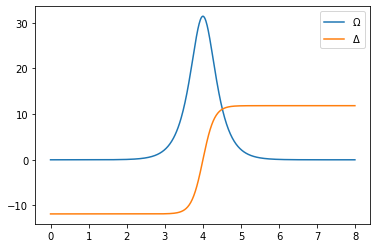

In [107]:
# Amplitude and Detuning of AE scheme
tlist = np.arange(0,8,0.01)
T0 = np.pi*0.15
detuning = np.pi*2
rabi_amp = np.pi*10
def Omega(t):
    return rabi_amp/np.cosh(np.pi*(t-4)/2/T0)
def Delta(t):
    return 2*(detuning)**2*T0/np.pi*np.tanh(np.pi*(t-4)/2/T0)
plt.plot(tlist,Omega(tlist),label=r"$\Omega$")
plt.plot(tlist,Delta(tlist),label=r"$\Delta$")
plt.legend()

In [84]:
T0 = np.pi*0.15
T1 = 4

from scipy.misc import derivative
def qubit_integrate_AE_schemes(psi0,tlist,detuning,rabi_amp):
    # evolve and calculate expectation values
    H0 = sz/2
    H1 = sx/2
    H2 = sy/2
    def Omega(t):
        return rabi_amp/np.cosh(np.pi*(t-T1)/2/T0)
    def Delta(t):
        return 2*(detuning)**2*T0/np.pi*np.tanh(np.pi*(t-T1)/2/T0)
    def H0_coeff(t,args):
        return Delta(t)
    def H1_coeff(t,args):
        return Omega(t)
    def H2_coeff(t,args):
        grad_delta = derivative(Delta, t, dx=1e-6)
        grad_omega = derivative(Omega, t, dx=1e-6)
        delta = Delta(t)
        omega = Omega(t)
        return (omega*grad_delta-grad_omega*delta)/(delta**2+omega**2)
    H = [[H0,H0_coeff],[H1,H1_coeff],[H2,H2_coeff]]
    output = mesolve(H, psi0, tlist,c_ops=[],e_ops=[sx,sy,sz],options = Options(store_final_state=True))
    return output

In [105]:

# You can choose your own writer and codec here.
# Setting codec=None sets the codec to the standard
# defined in matplotlib.rcParams['animation.codec']
psi0 = basis(2, 0)
detuning = np.pi*2
rabi_amp = np.pi*10
tlist = np.arange(0,8,0.01)
def get_P2_population(detuning,rabi_amp):
    tau = detuning*T0
    omega = rabi_amp/detuning
    p2 = 1-1/np.cosh(2*tau**2/np.pi)**2*np.cos(tau*np.sqrt(omega**2-4*tau**2/np.pi**2))**2
    return p2
get_P2_population(detuning,rabi_amp)

0.9999903404763646

In [106]:
sphere = None
result =  qubit_integrate_AE_schemes(psi0, tlist,detuning,rabi_amp)
plot_animation(plot_setup, plot_result, [result], writer="ffmpeg", codec=None)

<Figure size 360x360 with 0 Axes>